# Prerequisitos

In [1]:
!apt install libgraphviz-dev
!python -m pip install osmnx==1.1.2 networkx watermark pygraphviz pyvis
!pip uninstall -y matplotlib
!python -m pip install  matplotlib==3.1.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

## Carga de bibliotecas



In [2]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.drawing.nx_agraph import graphviz_layout

%matplotlib inline

# Introducción a los grafos

Un grafo es un conjunto de puntos que pueden relacionarse/conectarse con lineas. Al punto se le puede llamar vertices o nodo, y a las líneas, aristas o arco.

Una arista puede tener una dirección o ambas direcciones, lo mismo ocurre sentido del trafico de una calle. Algunas pueden tener solo un sentido o ser bidireccionales.

## Ejemplo 1: Un simple grafo con NetworkX

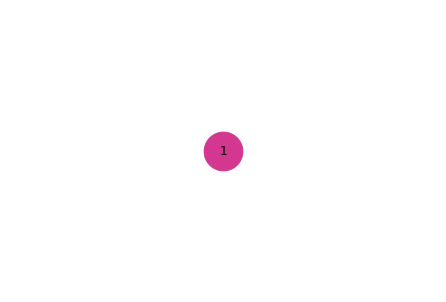

In [ ]:
G = nx.Graph()
G.add_node(1)

nx.draw(G, node_size=1500, node_color="#D43790", with_labels=True)

Una arista que tiene una dirección se suele llamar: arco.

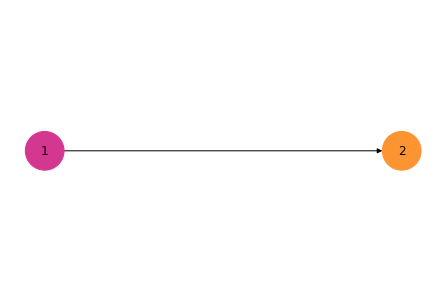

In [ ]:
G = nx.DiGraph()
G.add_node(1, label='1', color="#D43790")
G.add_node(2, label='2', color="#FC9432")
G.add_edge(1, 2)

colors = [G.nodes[i]["color"] for i in G.nodes]
position_nodes = {1:(1, 2), 2: (2, 2)}
nx.draw(G, node_size=1500, node_color=colors, with_labels=True, pos=position_nodes)

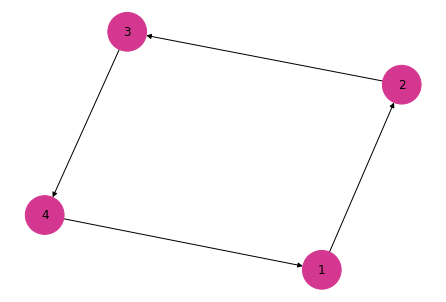

In [3]:
G = nx.DiGraph()

graph_attr = { node : { "label" : str(node), "color" : "#D43790"} for node in range(1, 5) }
G.add_nodes_from([(node, attr) for (node, attr) in graph_attr.items()])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

colors = [G.nodes[i]["color"] for i in G.nodes]
nx.draw(G, node_size=1500, node_color=colors, with_labels=True)

In [5]:
from pyvis.network import Network
from IPython.core.display import display, HTML

def show_graph(nt):
  nt.show('example.html')
  display(HTML('example.html'))

nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True, cdn_resources="remote")
nt.from_nx(G)
show_graph(nt)

## Ejemplo 2: Grafos no dirigidos (bidireccionales)

Los grafos pueden tener aristas que no tiene una sola dirección (es decir carentes de restricción), a estas le llamamos aristas no dirigidas.

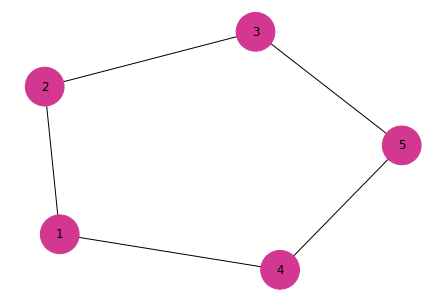

In [ ]:
G = nx.Graph()
graph_attr = { node : { "label" : str(node), "color" : "#D43790"} for node in range(1, 6) }
G.add_nodes_from([(node, attr) for (node, attr) in graph_attr.items()])
G.add_edges_from([(1, 2), (2, 3), (4, 5), (1, 4), (3, 5)])

colors = [G.nodes[i]["color"] for i in G.nodes]
nx.draw(G, node_size=1500, node_color=colors, with_labels=True)

## Ejemplo 3: Operaciones básicas sobre grafos

Los vecinos y el grado de un nodo


In [ ]:
print("Vecinos de nodo {}: {}".format(3, list(G.neighbors(3))))
print("Vecinos de nodo {}: {}".format(6, list(G.neighbors(5))))

print("Grado de nodo {}: {}".format(3, G.degree(3)))
print("Grado de nodo {}: {}".format(6, G.degree(5)))

Vecinos de nodo 3: [2, 5]
Vecinos de nodo 6: [4, 3]
Grado de nodo 3: 2
Grado de nodo 6: 2


## Otras bibliotecas para manejar grafos en Python

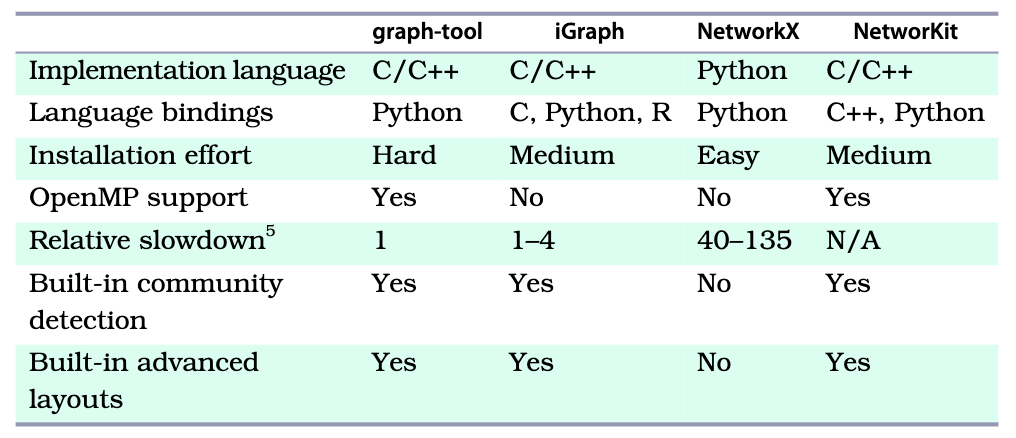


Imagen extraída del libro: Complex network analysis in Python. Autor: Dmitry Zinoviev.

## Ejemplo 4: Representando una intersección con un grafo

A continuación presentamos como un grafo puede representar la intersección de dos calles de una ciudad. Donde el nodo 1 y 5 es una misma calle, y otra calle sería el nodo 4 y 2, finalmente el nodo 3 sería donde ambas calles se intersectan.

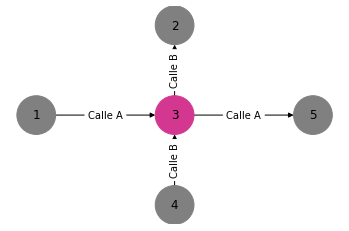

In [6]:
G = nx.DiGraph()

nodes_attr = { node : { "label" : str(node), "color" : "Gray"} for node in range(1, 6) }
G.add_nodes_from([(node, attr) for (node, attr) in nodes_attr.items()])

labels = {(1, 3): "Calle A", 
          (3, 5): "Calle A", 
          (4, 3): "Calle B", 
          (3, 2): "Calle B"}

edges_attr = { edge : { "labels" : labels[edge], "color" : "#D43790"} for edge in [(1,3), (3, 5), (4, 3), (3, 2)] }

G.add_edges_from([(e[0], e[1], attr) for (e, attr) in edges_attr.items()])

G.nodes[3]['color'] = "#D43790"

colors = [G.nodes[i]["color"] for i in G.nodes]
edge_labels = [G.edges[e]["labels"] for e in G.edges]

pos= { 1: (1, 2), 
       2: (2, 5), 
       3: (2, 2), 
       4: (2, -1),
       5: (3, 2), }

nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
nx.draw(G, pos, node_size=1500, node_color=colors, with_labels=True)

In [7]:
nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True, cdn_resources="remote")
nt.from_nx(G)
show_graph(nt)

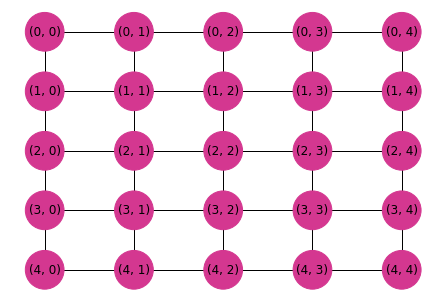

In [ ]:
G = nx.grid_2d_graph(5, 5)
for i in G.nodes:
  G.nodes[i]["color"] = "#D43790"

pos = { (x,y) : (y,-x) for x, y in G.nodes()}
colors = [G.nodes[i]["color"] for i in G.nodes]
nx.draw(G, pos, node_size=1500, node_color=colors, with_labels=True)

## Ejemplo 5: Usando diferente Layout

El proceso de visualización en networkx se divide en dos: diseño (layout) y renderización. La primera es la ubicación geometrica en el plano de cada nodo, y la segunda el mostrarla por pantalla.

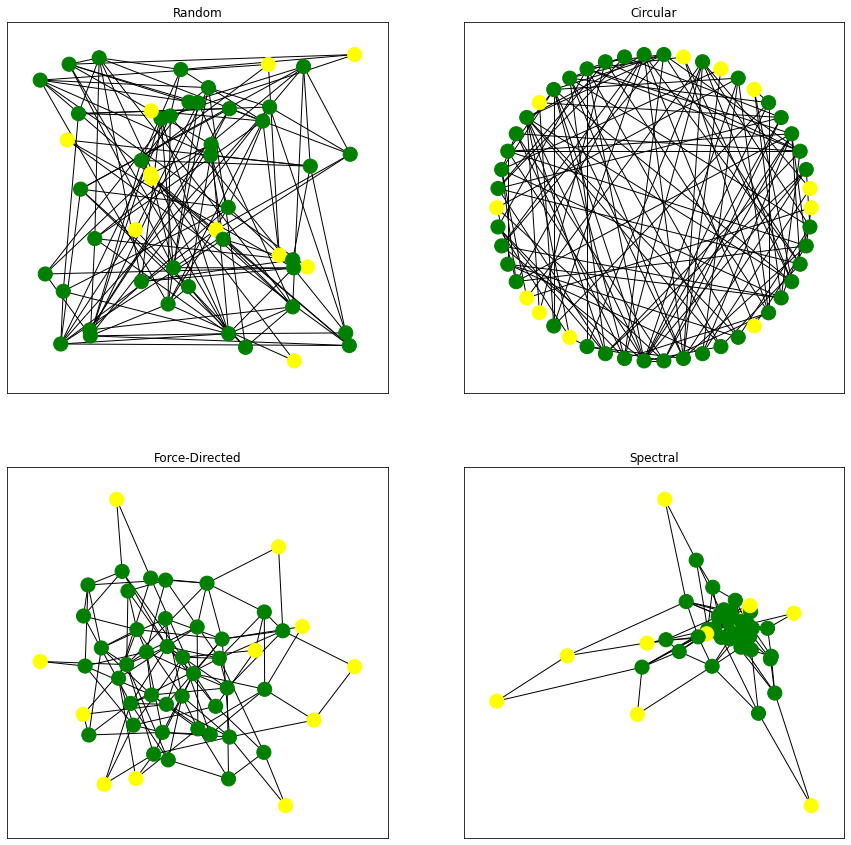

In [ ]:
G = nx. erdos_renyi_graph(50, 0.1)

colors = ["green" if G.degree(i) > 3 else "yellow" for i in G.nodes]

_, plot = plt.subplots(2, 2, figsize=(15, 15))
subplots = plot.reshape(1, 4)[0]

layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")

for plot, layout, title in zip(subplots, layouts, titles):
  plot.set_title(title)
  pos = layout(G)
  nx.draw_networkx(G, node_size=200, node_color=colors, pos=pos, ax=plot, with_labels=False)

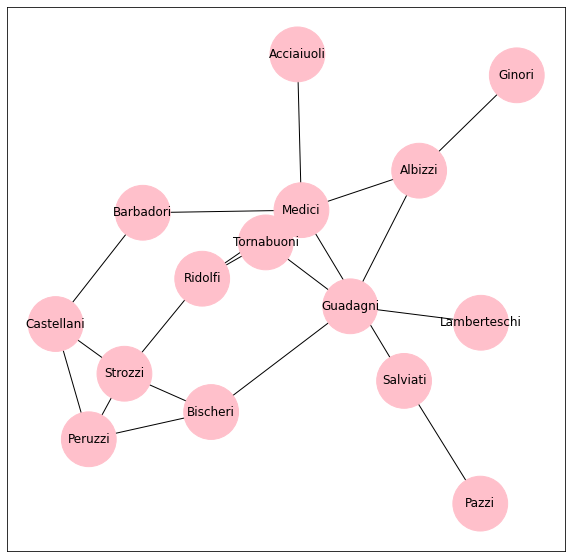

In [ ]:
_, plot = plt.subplots(figsize=(10, 10))
G = nx.florentine_families_graph()
nx.draw_networkx(G, ax=plot, node_size=3000, node_color=["pink" for i in G.nodes], with_labels=True)
#nx.draw_networkx(G, ax=plot, node_size=3000, node_color=["pink" for i in G.nodes], pos=graphviz_layout(G), with_labels=True)

Hay diferentes tipos de grafos aleatorios. A continuación se presentan los cuatros más caracteristicos.

Erdös-Rényi (p=0.05) (2, 2, 1)
Watts-Strogatz (k=4, p=0.5) (2, 2, 2)
Barabási-Albert (k=4) (2, 2, 3)
Holme-Kim (k=4, p=0.5) (2, 2, 4)


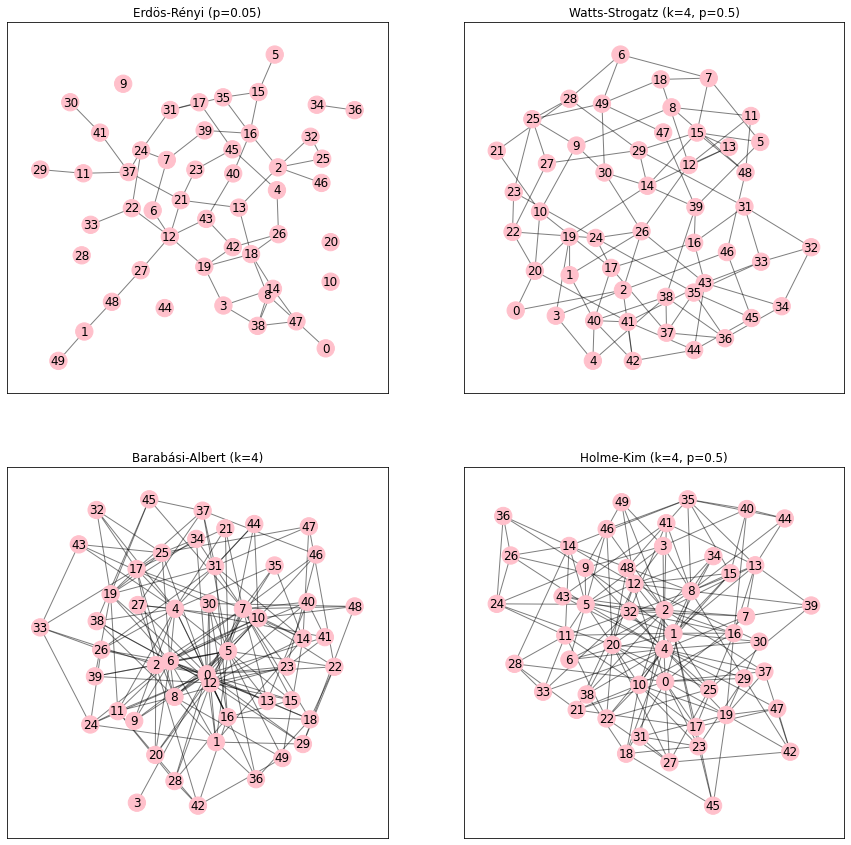

In [ ]:
G0 = nx. erdos_renyi_graph(50, 0.05) # probabilidad de generar una arista por cada nodo 
G1 = nx.connected_watts_strogatz_graph(50, 4, 0.5) # nº inicial de vecinos y la probabilidad de reconexión
G2 = nx. barabasi_albert_graph(50, 4) # nº de vecinos/aristas por cada nodo
G3 = nx. powerlaw_cluster_graph(50, 4, 0.5) # lo mismo de la anterior más la probabilidad de añadir un triangulo por cada arista
names = ("Erdös-Rényi (p=0.05)", "Watts-Strogatz (k=4, p=0.5)", "Barabási-Albert (k=4)", "Holme-Kim (k=4, p=0.5)")

graphs = G0, G1, G2, G3

layouts = (graphviz_layout, graphviz_layout, graphviz_layout, graphviz_layout)
locations = (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4)
f = plt.figure(figsize=(15, 15))

for g, name, layout, loc in zip(graphs, names, layouts, locations):
    ax = f.add_subplot(*loc)
    ax.set_title(name)
    pos = layout(g)
    nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_nodes(g, pos, node_color=["pink" for i in g.nodes], ax=ax)
    nx.draw_networkx_labels(g, pos, ax=ax)
    print(name, loc)


## Ejemplo 6: Métricas de centralidad

Las métricas de centralidad es un valor que mide la revelancia de un nodo dentro de un grafo.

### Degree centrality (Centralidad por grado)

\begin{align}
D(u) = \frac{N(u)}{n-1}
\end{align}

El valor normalizado es la división entre el número de vecinos de un nodo $u$ por el total de nodos del grafo $n-1$.

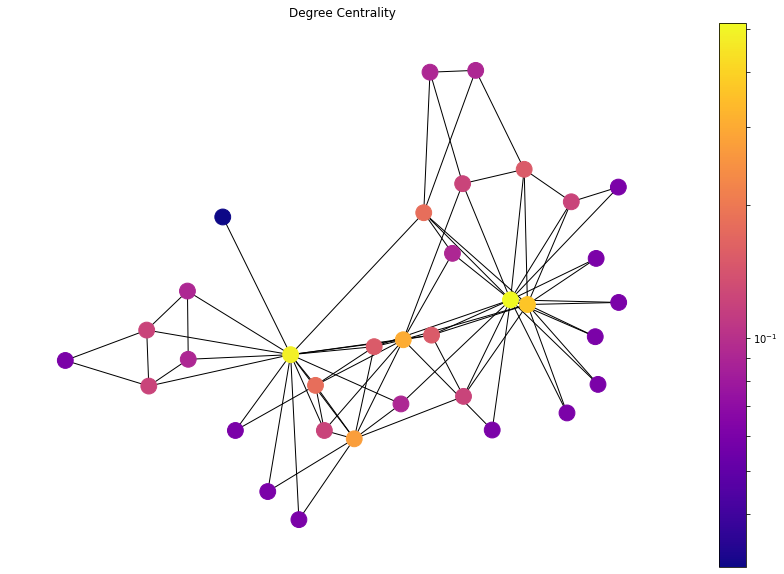

In [ ]:

G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=123)
measures = nx.degree_centrality(G)
title = 'Degree Centrality'

plt.figure(figsize=(15, 10))

nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                node_color=list(measures.values()),
                                nodelist=measures.keys())
# normalización en los colores
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
edges = nx.draw_networkx_edges(G, pos)

plt.title(title)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

### Closeness centrality (Centralidad por cercanía)

\begin{align}
C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}
\end{align}

donde $d(v, u)$ es el camino más corto entre $v$ y $u$, y $n-1$ es el número de nodos que es posible alcanzar desde $u$.

Mientras más alto sea el valor de cercania (closeness) indica una mayor centrality.

#### Ejercicio: Replicar el ejemplo anterior pero con closeness centrality

### Betweenness centrality (Centralidad de intermediación)

\begin{align}
c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}
\end{align}

donde $V$ es el conjunto de nodos, 

$\sigma(s, t)$ es el número de caminos más corto $(s, t)$-caminos, y 

$\sigma(s, t|v)$ es el número de cuyos caminos pasan a través de algún nodo $v$.

Si $s = t$, $\sigma(s, t) = 1$, y si $v \in {s, t}$,  $\sigma(s, t|v) = 0$.

#### Ejercicio: Replicar el ejemplo anterior pero con betweenness centrality


# Analísis de redes urbanas

In [ ]:
# parameters
CITY="Granada, Spain"
DIST=500 # metros
NETWORK_TYPE = "bike" # {"all_private", "all", "bike", "drive", "drive_service", "walk"}

G = ox.graph_from_address(CITY, dist=500, network_type=NETWORK_TYPE)
# G = ox.project_graph(G)  # TODO: proyectar para pasar de 3D/lat-lon a mapa (2D)
_ = ox.plot_graph(G)

In [ ]:
from pprint import pprint

# ref: https://geoffboeing.com/2016/11/osmnx-python-street-networks/
basic_stats = ox.basic_stats(G)

pprint(basic_stats)

In [ ]:
# ref: https://geoffboeing.com/2016/11/osmnx-python-street-networks/

extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

Para evitar errores añadiendo la dirección por string, usamos la latitud (X) y longitud (Y) de una ubicación. Usamos la distancia euclideana para encontrar el punto más cercano entre X e Y.

In [ ]:
# https://www.latlong.net/convert-address-to-lat-long.html

origin_address = (40.033240, -3.583980)  # Alhambra, C. Real de la Alhambra, s/n, 18009 Granada
target_address = (37.148660, -3.609960)  # Sala Paraninfo - Edificio Central - Universidad de Granada - Campus de la Salud, Av. de la Ilustración, 80, 18007 Urb. los Vergeles, Granada 

orig_node = ox.get_nearest_node(G, origin_address, method='euclidean')
target_node = ox.get_nearest_node(G, target_address, method='euclidean')

route = nx.shortest_path(G, source=orig_node, target=target_node, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

travel_time = nx.shortest_path_length(G, orig_node, target_node, weight='travel_time')
print("{} minutos".format(round(travel_time)))


## Integrando Pandas

### Nodos

In [ ]:
nodes_df = pd.DataFrame.from_dict(G.nodes, orient='index')

In [ ]:
nodes_df.head()

### Arcos

In [ ]:
edge_df = nx.to_pandas_edgelist(G)

In [ ]:
edge_df.head()

In [ ]:
# ref: https://max-coding.medium.com/osmnx-part-1-loading-data-from-open-street-maps-and-finding-shortest-route-between-two-points-5bb073b0a27d

import osmnx.speed as oxs

G = oxs.add_edge_speeds(G)
G = oxs.add_edge_travel_times(G)

In [ ]:
edge_df = nx.to_pandas_edgelist(G)

In [ ]:
edge_df.head()

## Un poco más sobre métricas de centralidad

### Centralidad de nodos

In [ ]:
# ref: https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/08-example-line-graph.ipynb

# centralidad por cercanía del grafo
node_centrality = nx.closeness_centrality(G)

# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

### Centralidad de arcos

In [ ]:
# TODO: actualizar/limpiar el código?
# ref: https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/08-example-line-graph.ipynb

import matplotlib.colors as colors
# se cálcula la centralidad por cercanía para el grafo
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

# lista de los valores de las aristas para el graph original. 
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# se asigna una escala de colores para cada arista.
norm = colors.Normalize(vmin=min(ev) * 0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# el color de las aristas en el grafo con la centralidad de cercanía en el grafo
fig, ax = ox.plot_graph(G, bgcolor='k', 
                        # axis_off=True, # TODO: deprecated 
                        node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

> Ejercicio: Hacer lo mismo pero con _betweenness centrality_, que es un proxy para tránsito.



# Para seguir aprendiendo

- Libros:

  - [Introducción a las redes complejas](https://medium.com/analytics-vidhya/introduction-to-complex-network-analysis-15b50947a794)

  - [Libro: Network Science](http://networksciencebook.com/), Autor: Barabási.

  - Libro: Complex network analysis in Python. Autor: Dmitry Zinoviev. 
  
  ![image](https://m.media-amazon.com/images/P/B079ZN9K5M.01._SCLZZZZZZZ_SX500_.jpg)

- Trabajar con trayectorias (movilidad): [Scikit-mobility](https://scikit-mobility.github.io/scikit-mobility/)

# Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w